### Data Camp - Intermediate Regression with statsmodels in Python
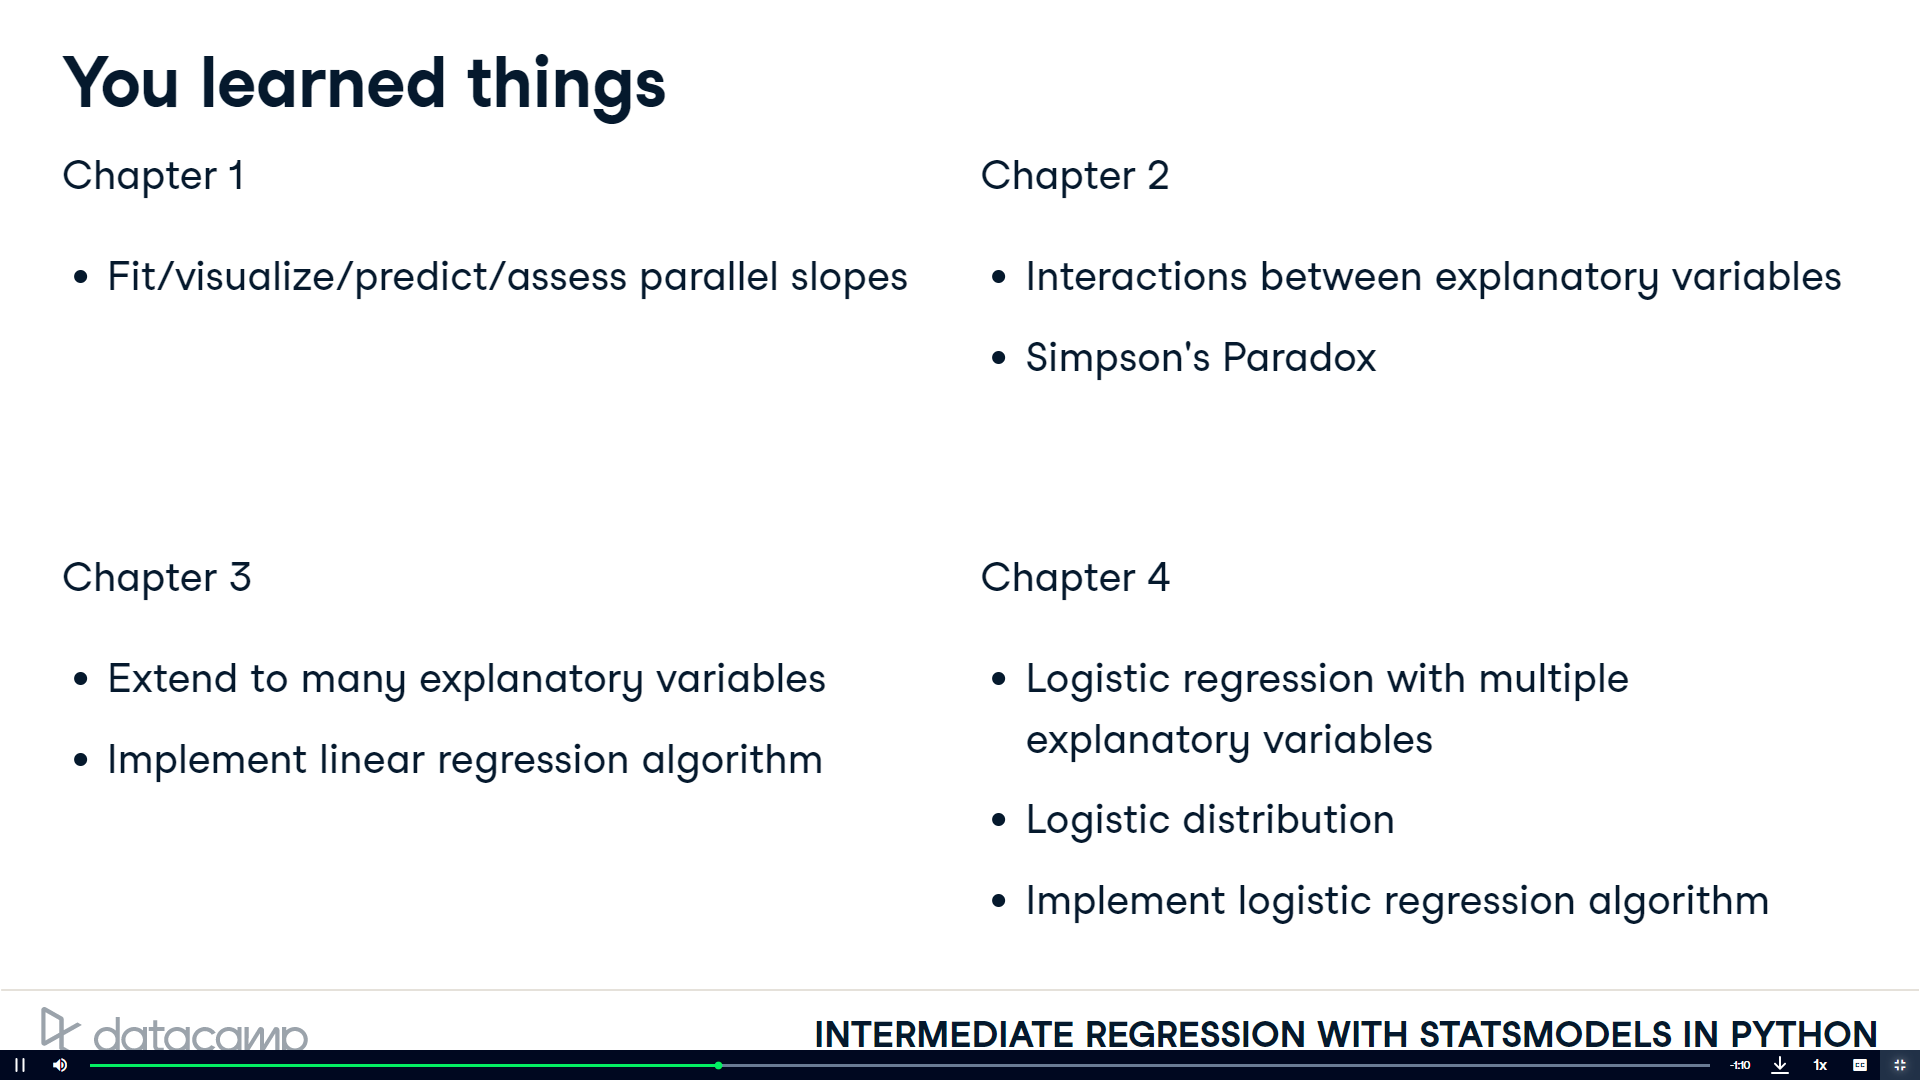

#### Course does not include train-test-split, cross-validation, P-values and significance which should be included in regression models

### Chapter 1 - Parallel Slopes

- fish df, linear regression
        from statsmodels.formula.api import ols
        # target variable on left, explanatory variable on right
        mdl_maxx_vs_length = ols("mass_g ~ length_cm", data=fish).fit()
        # output is 1 slope coefficient and 1 intercept for 1 exp. variable
        print(mdl_mass_vs_length.params)

- change explanatory variable to species (categorical)
        # use +0 to tell program not to include intercept (easier to read)
        mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()
        # output: 1 coefficient for each species
        print(mdl_mass_vs_species.params)

- including both variable at same time
        mdl_mass_vs_both = ols("mass_g ~ length_cm + species + 0", data=fish).fit()
        #output: 1 slope coefficient & 1 intercept coefficient for each category
        print(mdl_mass_vs_both.params)

- coefficients are different when combined
- visualization of NUMERICAL exp variable
        sns.regplot(x='length_cm', y='mass_g', data=fish. ci=None)
        plt.show()
- visualization of CATEGORICAL exp variable
        sns.boxplot(x='species', y='mass_g', data=fish, showmeans=True)
- visualization of both exp variables
        #extract coefficients into seperate variables
        coeffs = mdl_mass_vs_both.params
        ic_bream, ic_perch, ic_pike, ic_roach, sl = coeffs
        #hue argument  colors categorical variable by values
        sns.scatterplot(x='length_cm', y='mass_g', hue='species', data=fish)
        #call axline for each categorical var category
        plt.axline(xy1=(0, ic_bream), slope=sl, color='blue')
        plt.axline(xy1=(0, ic_perch), slope=sl, color='green')
        plt.axline(xy1=(0, ic_pike), slope=sl, color='red')
        plt.axline(xy1=(0, ic_roach), slope=sl, color='orange')
- all slopes are the same so this method with one numeric and one categorical explanatory variable is called Parallel Slopes Linear Regression

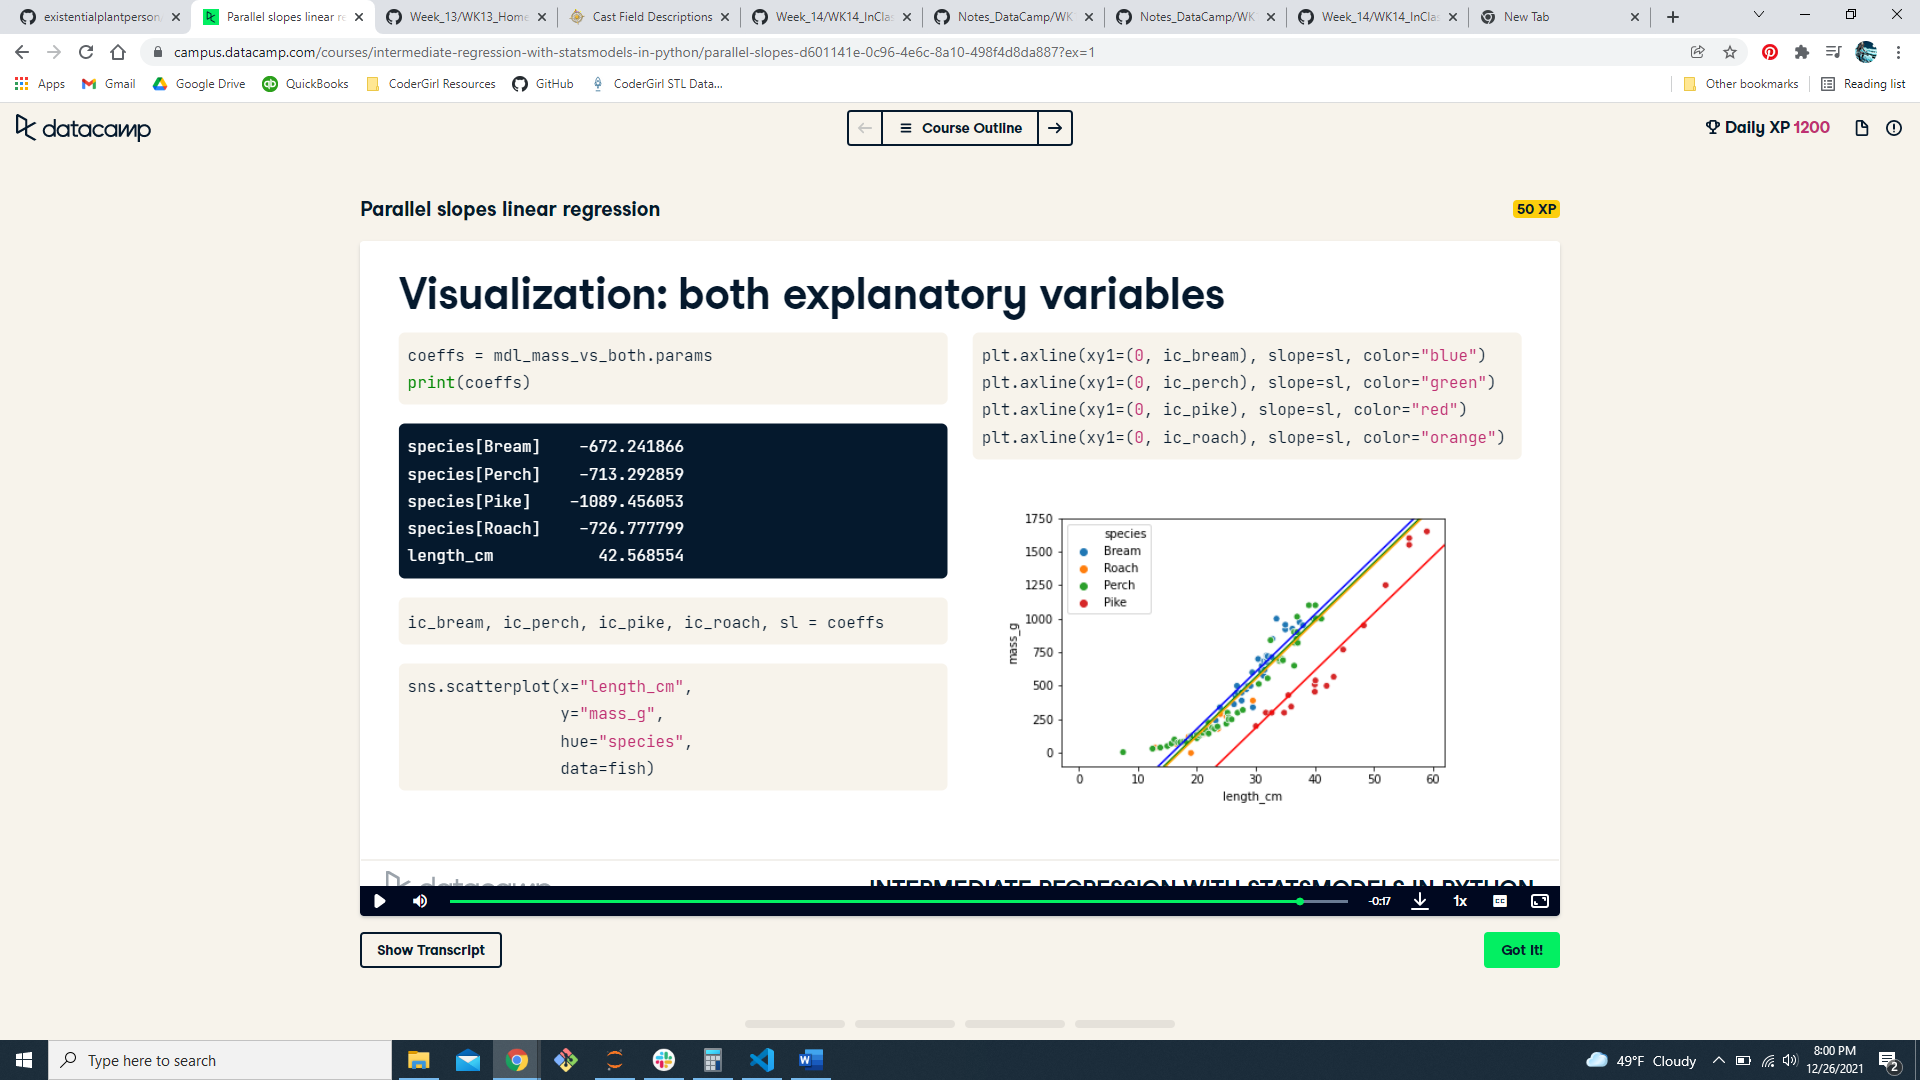

In [ ]:
## FITTING PARALLEL SLOPES LINEAR REGRESSION

# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

OUTPUT:
Intercept        8.224237
n_convenience    0.798080


# Fit a linear regression of price_twd_msq vs. house_age_years (3 categories), no intercept
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

OUTPUT:
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264


# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years +0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

OUTPUT:
house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457

In [ ]:
## INTERPRETING PARALLEL SLOPES COEFFICIENTS

## For each additional nearby convenience store, the expected house price, 
## in TWD per square meter, increases by 0.79.

## For a house aged 0 to 15 years with zero nearby convenience stores, 
## the expected house price is 9.41 TWD per square meter.

In [ ]:
## VISUALIZING EACH EXPLANATORY VARIABLE

# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None)

# Show the plot
plt.show()

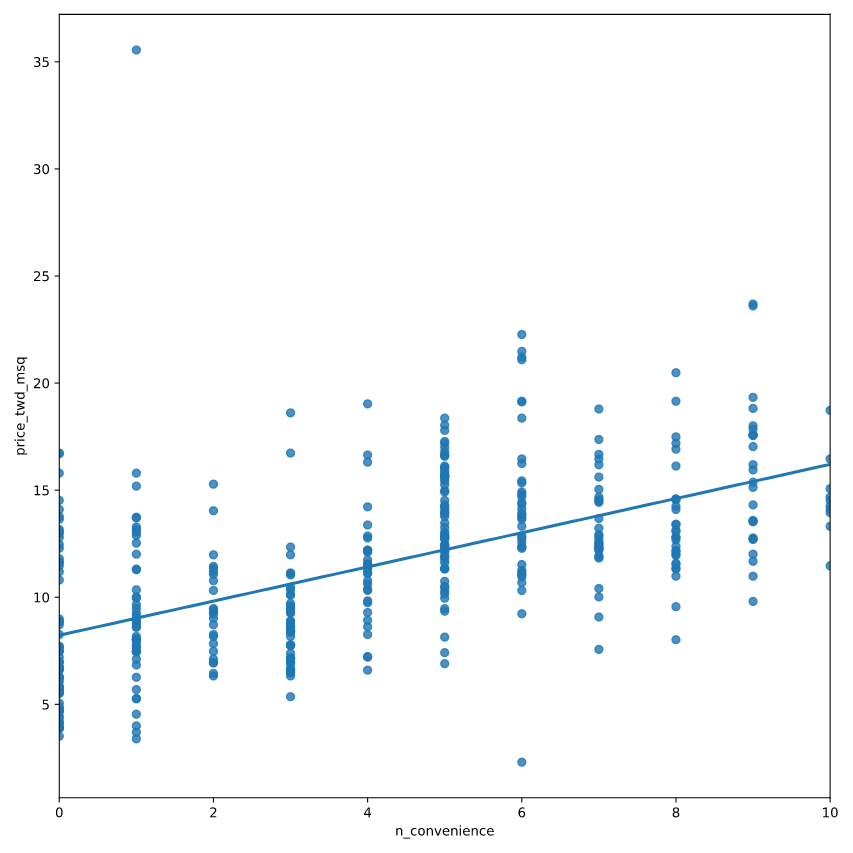

In [ ]:
# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(x='house_age_years', y='price_twd_msq', data=taiwan_real_estate)

# Show the plot
plt.show()

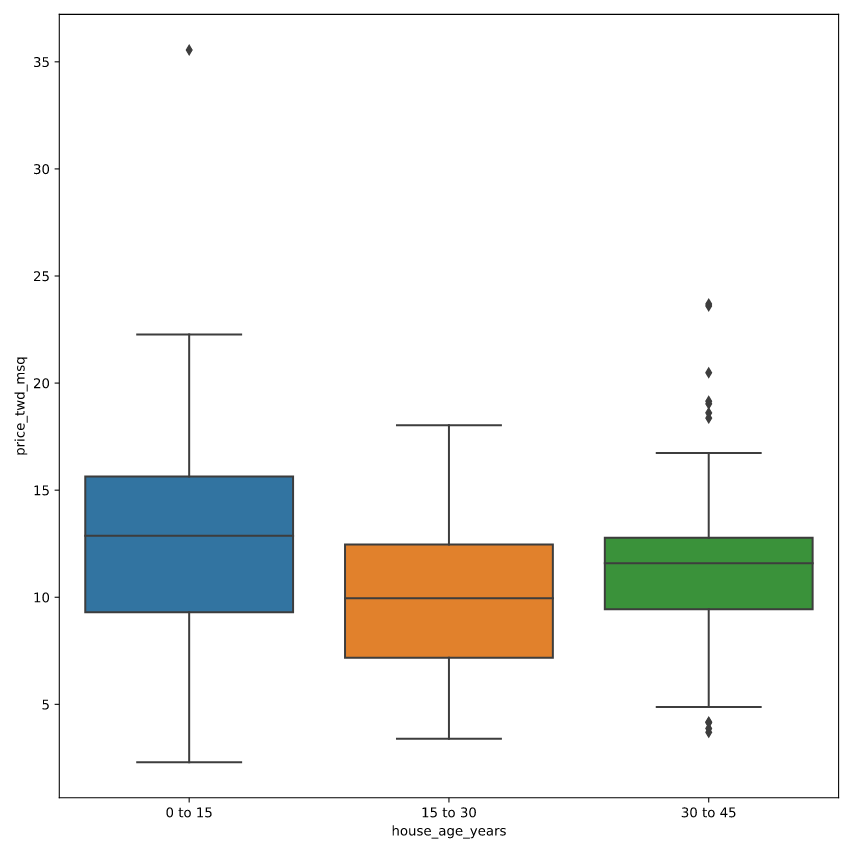

In [ ]:
## VISUALIZING PARRALEL SLOPES

# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

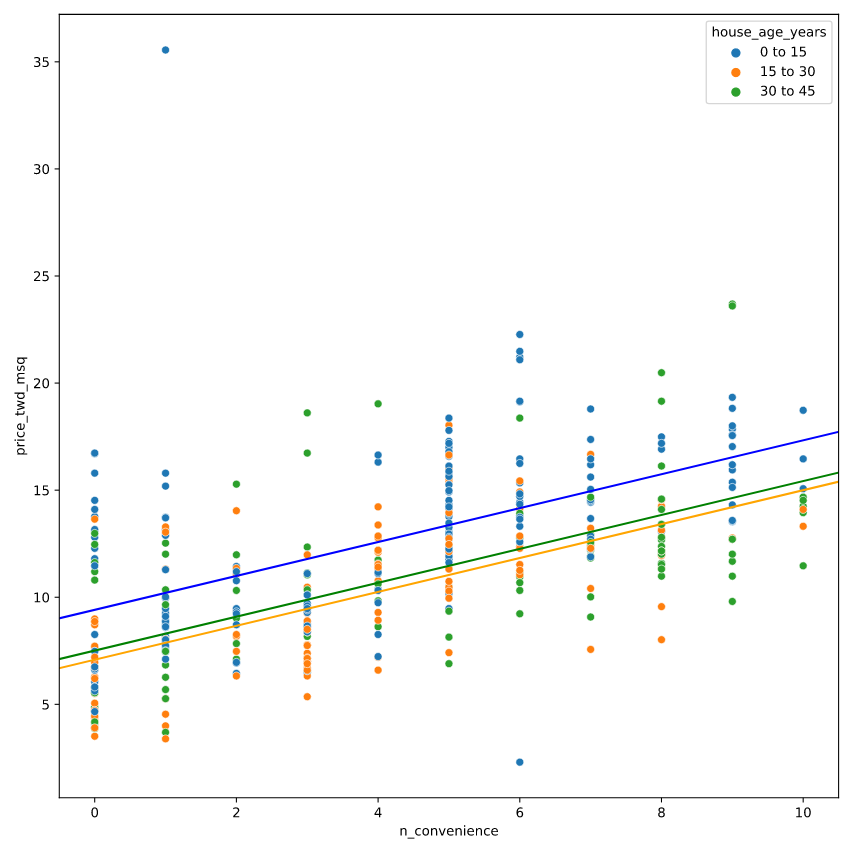

#### Predicting Parallel Slopes
- choose values and store in dataframe
        expl_data_length = pd.DataFrame({'length_cm':np.arange(6, 61, 5)})
        # can pull the unique variables from a categorical variable
        species = fish['species'].unique()
- product function return all combinations of the inputs        
        from itertools import product
        p = product(length_cm, species)
        # transform product into df
        expl_data_both = pd.DataFrame(p, columns = ['length_cm', 'species'])
- add column of predictions
        # predict mass_g from length_cm only
        prediction_data_length = expl_data_length.assign(mass_g = mdl_mass_vs_length.predict(expl_data)
        # predict mass_g from both exp variables
        prediction_data_length = expl_data_length.assign(mass_g = mdl_mass_vs_both.predict(expl_data)
- visualize the predictions
        #over the top of our parallel slope plot above, add:
        sns.scatterplot(x='length_cm', y='mass_g', color='black', data=prediction_data)
- manually calculate prediction for linear regression
        coeffs = mdl_mass_vs_length.params
        intercept, slopt = coeffs
        explanatory_data = pd.DataFrams({'length_cm':np.arange(6,61,5)})
        prediction_data = explanatory_data.assign(mass_g = intercept + slope * explanatory_data)
- reminder that each category of categorical variable has a different intercept prediction in parallel slopes model, to make predictions you would have to make if, else statements to select the appropriate intercept
- np.select() function simpliflies process, both lists must be the same length; if condition 1 is met, take choice 1, if condition 2 is met, take choice 2...etc.
        # conditions list, True or False each species
        conditions = [explanatory_data['species'] == 'Bream',
                      explanatory_data['species'] == 'Perch',
                      explanatory_data['species'] == 'Pike'
                      explanatory_data['species'] == 'Roach']
        # choices list, collection of intercepts extracted from coefficients
        choices = [ic_bream, ic_perch, ic_pike, ic_roach]
        # np.select retrieves intercept for each species
        intercept = np.select(conditions, choices)

- calculate the response
        prediction_data = explanatory_data.assign(
            intercept = np.select(conditions, choices),
            mass_g = intercept + slope * explanatory_data['length_cm'])
        print(prediction_data)
        
        should have same numbers as:
        mdl_mass_vs_both.predict(explanatory_data)

In [ ]:
## PREDICTIONG WITH A PARALLEL SLOPES MODEL
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

print(explanatory_data)

# Add predictions to the DataFrame
# Call .assign() to append a new column to a DataFrame
# Create the price_twd_msq column by calling .predict() on mdl_price_vs_both

prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both.predict(explanatory_data))

print(prediction_data)

In [ ]:
## VISUALIZING PARALLEL SLOPES MODEL PREDICTIONS

# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=prediction_data, color='black')

plt.show()

In [ ]:
## MANUALLY CALCULATING PREDICTIONS

# Define conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data)

#### Assessing Model Performance

model performance metrics
- coefficient of determination (R-squared) - how well the linear regression line fits the observed values
    - larger is better
- residual standard error (RSE) - the typical size of the residuals
    - smaller is better
- getting coefficient of determination
        print(mdl_mass_vs_lenght.rsquared)
        print(mdl_mass_vs_specoes.rsquared)
        print(mdl_mass_vs_both_rsquared)
        #highest R-squared value is the best model
- more explanatory variables often increases R-squared but can lead to overfitting
- adjusted coefficient of determination penalizes more explanatory variables
       mdl_mass_vs_both.rsquared_adj
- Residual standard error (MSE - mean square error is availalbe so take the square root of MSE)
        rse_length = np.sqrt(mdl_mass_vs_both.mse_resid)

In [ ]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

OUTPUT:
rsquared_conv:  0.32604660851305034
rsquared_adj_conv:  0.32441079931041206
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887396
rsquared_adj_both:  0.3907483227109877

In [ ]:
## COMPARING RESIDUAL STANDARD ERROR

# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

OUTPUT:
rse_conv:  3.383887521343047
rse_age:  3.950183875630859
rse_both:  3.2134602805523227

### CHAPTER 2 - INTERACTIONS

#### Models for each category

- using fish dataset, split each category into a seperate model
        # repeat for each category
        # each model gives a different intercept and slop
        bream = fish[fish['species] == 'Bream'
        mdl_bream = ols('mass_g ~ length_cm', data=bream).fit()
- create dataframe of explanatory variables, this will work for each model
        explanatory_data = pd.DataFrame({'length_cm': np.arange(5,61,5)})
        
- predict, add column with .assign, name after response var., call predict on model and add explanatory data as the argument, add species name to ease plotting (not necesary for predictions
        # repeat for each model
        prediction_data_bream = explanatory_data.assign(
            mass_g = mdl_bream.predict(explanatory_data),
            species = 'Bream')
      
- concat predictions into one dataframe
        prediction_data = pd.concat([prediction_data_bream, prediction_data_roach, prediction_data_perch, prediction_data_pike])     
- visualize predictions, use lmplot
        #hue is categorical variable
        sns.lmplot(x='length_cm', 
                   y='mass_g', 
                   data=fish, 
                   hue='species', ci=None)
        plt.show()
        # add predictions
        sns.scatterplot(x='length_cm', 
                        y='mass_g', 
                        data=prediction_data, 
                        hue='species', ci=None, legend=False)
- coefficient of determination, determine which method is better
        # combined in parallel slopes
        mdl_fish.rsquared_adj
        # repeat for each species model
        mdl_bream.rsquared_adj 
- residual standard error
        # combined model
        np.sqrt(ml_fish.mse_resid)
        #repeat for individual models
        np.sqrt(mdl_bream.mse_resid)
- mixed performance is common

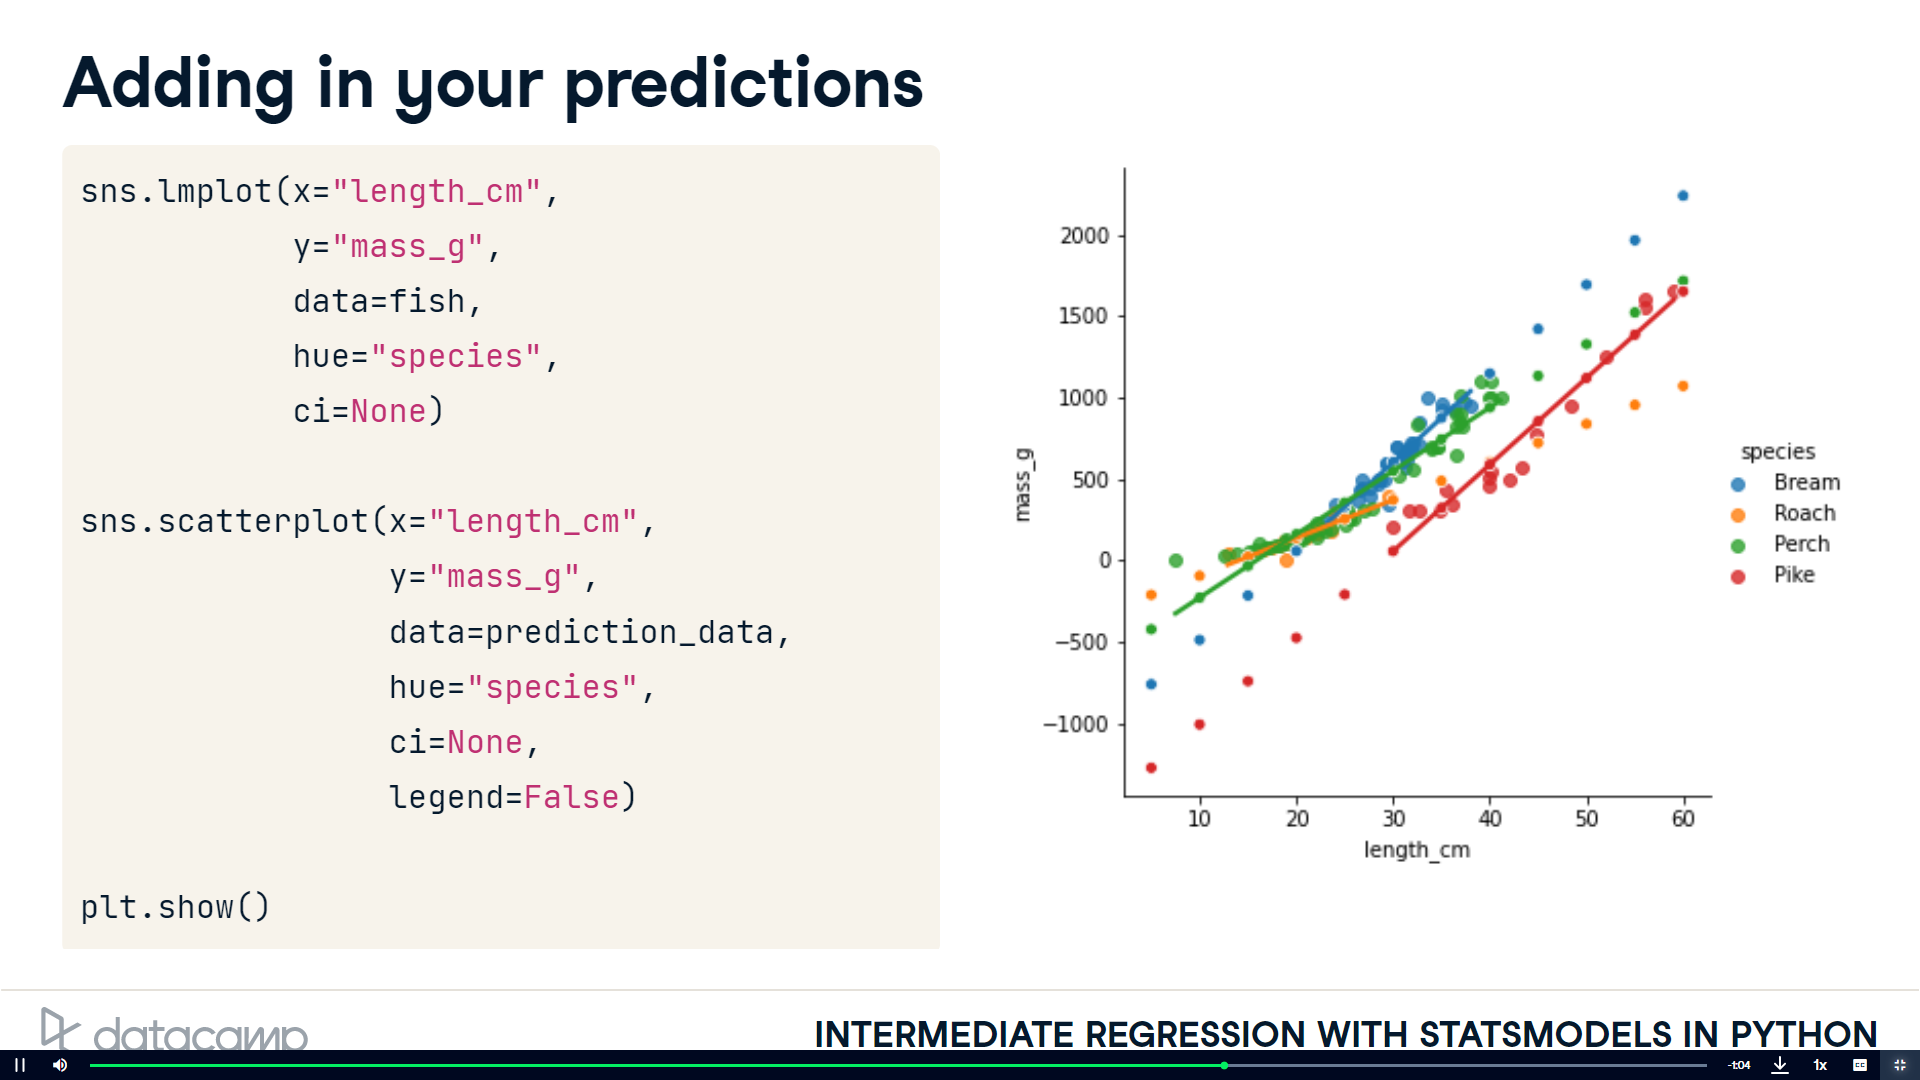

In [ ]:
## ONE MODEL PER CATEGORY

# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols('price_twd_msq ~ n_convenience', data=taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols('price_twd_msq ~ n_convenience', data=taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols('price_twd_msq ~ n_convenience', data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

In [ ]:
## PREDICTING MULTIPLE MODELS

# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign(price_twd_msq = mdl_0_to_15.predict(explanatory_data))

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(price_twd_msq = mdl_15_to_30.predict(explanatory_data))

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(price_twd_msq = mdl_30_to_45.predict(explanatory_data))

print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)

In [ ]:
## VISUALIZING MULTIPLE MODELS

# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x='n_convenience',
     y='price_twd_msq',
     data=taiwan_real_estate,
     hue='house_age_years',
     ci=None,
     legend_out=False)

plt.show()

# Add a scatter plot for prediction_data
sns.scatterplot(x='n_convenience',
 y='price_twd_msq',
 data=prediction_data, 
 hue='house_age_years',
     legend=False)

plt.show()

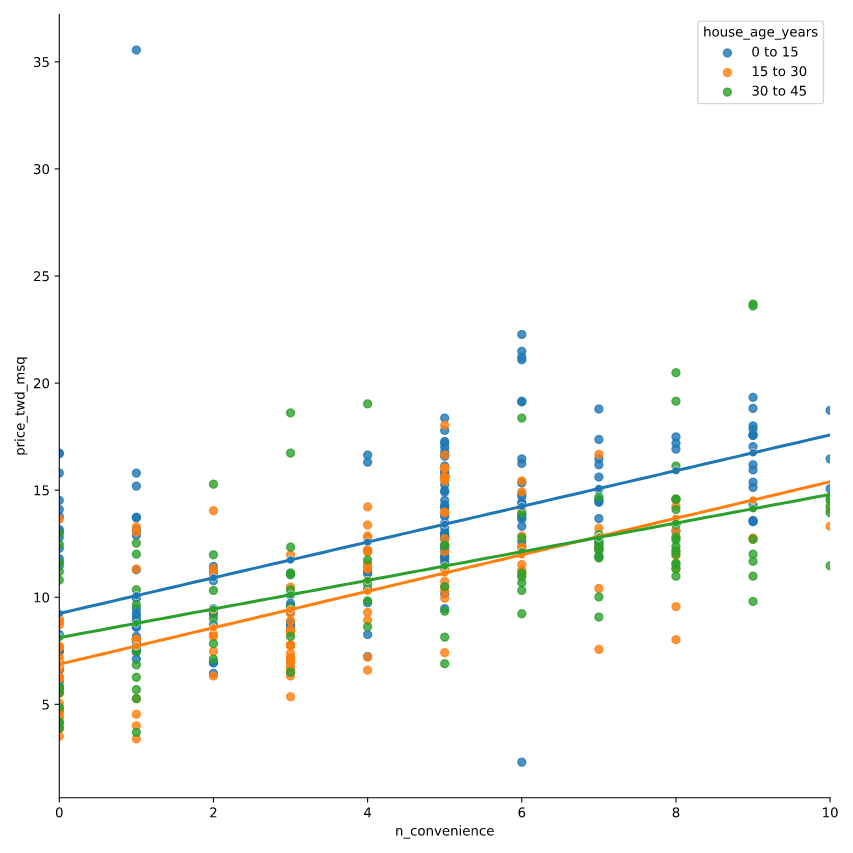

In [ ]:
## ASSESSING MODEL PERFORMANCE

# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

OUTPUT:
R-squared for mdl_all_ages:  0.32604660851305034
R-squared for mdl_0_to_15:  0.3120536339435178
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281
    

# Print the RSE for mdl_all_ages
print("RSE for mdl_all_ages: ", np.sqrt(mdl_all_ages.mse_resid))

# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid))

# Print the RSE for mdl_15_to_30
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))

OUTPUT:
RSE for mdl_all_ages:  3.383887521343047
RSE for mdl_0_to_15:  3.564126993631971
RSE for mdl_15_to_30:  2.5852728709073385
RSE for mdl_30_to_45:  3.239037479434981

### One Model with an Interaction

- Rather than using multiple models with pieces of data, use one model with interactions
    - Ex: different fish species have different mass to length ratios and the effect of length on expected mass is different for different species; generally: the effect of one explanatory variable on the expected response changes depending on the value of another explanatory variable (interaction)
- Specifying interactions
    - No interaction
            response ~ exp1 + exp2
    - With interaction (implicit - stats models figures out the interactions)
            response ~ exp1 * exp2
    - With interaction (explicit, result is the same)
            response ~ exp1 + exp2 + exp1:exp2
- Coefficients
        #produces difficult to read coefficients
        mdl_mass_vs_both = ols('mass_g ~ lenght_cm * species", data=fish).fit()
        mdl_mass_vs_both.params
        # produces easier to read coefficients
        mdl_mass_vs_both_inter = ols('mass_g ~ species + species:length_cm +0", data=fish).fit()
        mdl_mass_vs_both_inter.params

In [ ]:
## SPECIFYING AN INTERACTION

# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience * house_age_years', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

OUTPUT:
Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64
    
    
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

OUTPUT:
Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64

In [ ]:
## INTERACTIONS WITH UNDERSTANDABLE COEFFS
## In order clarify what the model is predicting, you can reformulate the model 
## in a way that returns understandable coefficients, compare the results

# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols('price_twd_msq ~ house_age_years + n_convenience + 0', data=taiwan_real_estate).fit()

# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)

OUTPUT:
mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

     mdl_readable_inter coefficients: 
     house_age_years[0 to 15]                   9.241702
    house_age_years[15 to 30]                  6.871919
    house_age_years[30 to 45]                  8.113123
    n_convenience:house_age_years[0 to 15]     0.833587
    n_convenience:house_age_years[15 to 30]    0.851917
    n_convenience:house_age_years[30 to 45]    0.668698
    dtype: float64

### Making Predictions with Interactions

- Mass vs Length with interaction:
        mdl_mass_vs_both_inter = ols('mass_g ~ species + species:length_cm +0',
                                 data=fish).fit()
- Prediction flow
    - same as parallel slopes, use product to get all combinations of lengths and species
            from itertools import product
            length_cm = np.arange(5,61,5)
            species = fish['species'].unique()
            p = product(length_cm, species)
    - convert to df and name columns
            explanatory_data = pd.DataFrame(p, columns=['length_cm', 'species'])
    - statsmodel automatically takes care of the interactions in prediction data
            prediction_data = explanatory_data.assign(
                              mass_g = mdl_mass_vs_both.predict(explanatory_data))
        
    - plot predictions, same as parallel slopes, but more simple code to get there
            sns.lmplot(x='length_cm', y='mass_g', data=fish, hue='species', ci=None)
            sns.scatterplot((x='length_cm', y='mass_g', data=prediction_data, hue='species')
            plt.show()
        
- manually calculating the predictions, same as .predict() function
    - get coefficients from model
            coeffs = mdl_mass_vs_both_inter.params
    - unpack coefficients into 4 intercepts and 4 slopes
            ic_bream, ic_perch, ic_pike, ic_roach, 
            slope_bream, slope_perch, slope_pike, slope_roach = coeffs
    - use select functions with conditions and choices for intercept and slope
            conditions = [explanatory_data['species'] == 'Bream', 
                          explanatory_data['species'] == 'Perch', 
                          explanatory_data['species'] == 'Pike', 
                          explanatory_data['species'] == 'Roach']
            ic_choices = [ic_bream, ic_perch, ic_pike, ic_roach]
            intercept = np.select(conditions, ic_choices)
            slope_choices = [slope_bream, slope_perch, slope_pike, slope_roach]
            slope = np.select(conditions, slope_choices)
    - calculate predictions, same as those returned by the .predict() function
            prediction_data = explanatory_data.assign(
                              mass_g = intercept + slope * explanatory_data['length_cm'])
            print(prediction_data)

In [ ]:
## PREDICTING WITH INTERACTIONS

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign( 
      price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x = 'n_convenience', y='price_twd_msq', data = taiwan_real_estate, hue='house_age_years', ci=None)

# Add a scatter plot for prediction_data
sns.scatterplot(x = 'n_convenience', y='price_twd_msq', data = prediction_data, hue='house_age_years',
     legend=False)

# Show the plot
plt.show()

In [ ]:
## MANUALLY CALCULATING PREDICTIONS WITH INTERACTIONS

# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
  price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

# Print it
print(prediction_data)

### Simpson's Paradox

Simpson's Paradox occurs when the trend of a model on the whole dataset is very different from the trends shown by models on subsets of the data (trend = slope coefficient)

In the most extreme case, you may see a positive slope on the whole dataset, and negative slopes on every subset of that dataset (or the other way around).

- If possible, try to plot the dataset to view trends
- you can't choose the best model in general, depends on the dataset and the question
- articulate a question before modeling

resolving differences can be messy, may be missing explanatory variables and context about the dataset

In [ ]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x='openbid', y='price', data=auctions)

# Show the plot
plt.show()

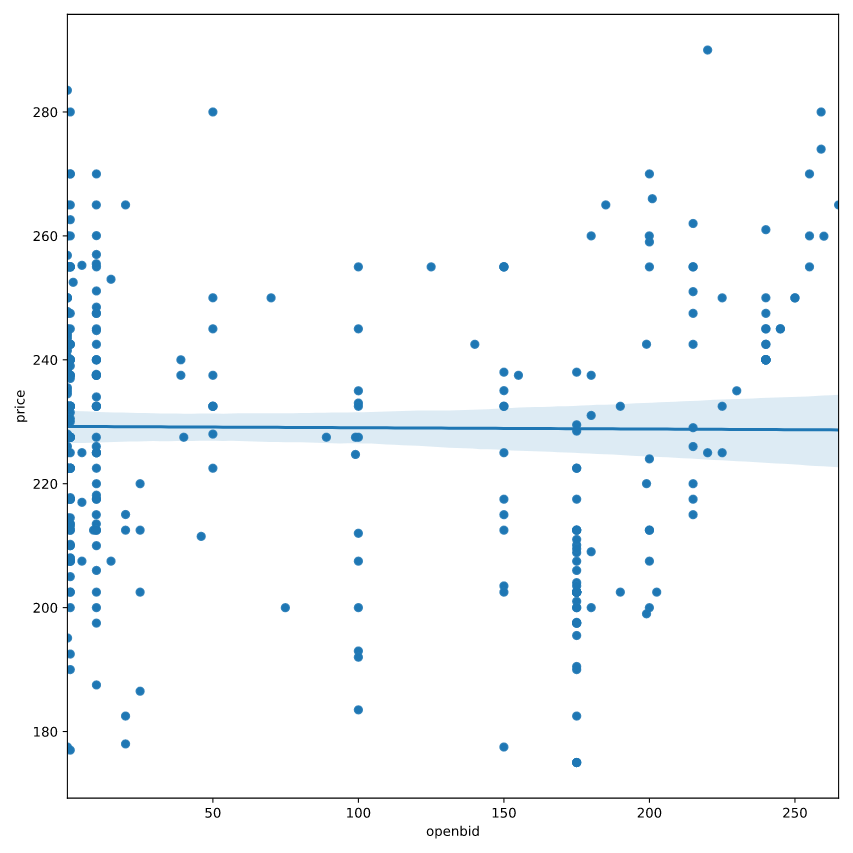

In [ ]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
#The formula of the model should be of the form categorical_var + continuous_var:categorical_var + 0.
mdl_price_vs_both = ols('price ~ auction_type + openbid:auction_type + 0', data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

OUTPUT:
auction_type[3 day auction]            226.369005
auction_type[5 day auction]            221.599320
auction_type[7 day auction]            231.602861
openbid:auction_type[3 day auction]     -0.029026
openbid:auction_type[5 day auction]      0.084014
openbid:auction_type[7 day auction]      0.003682
    
    
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(x='openbid', y='price', data=auctions, hue='auction_type', ci=None)

# Show the plot
plt.show()


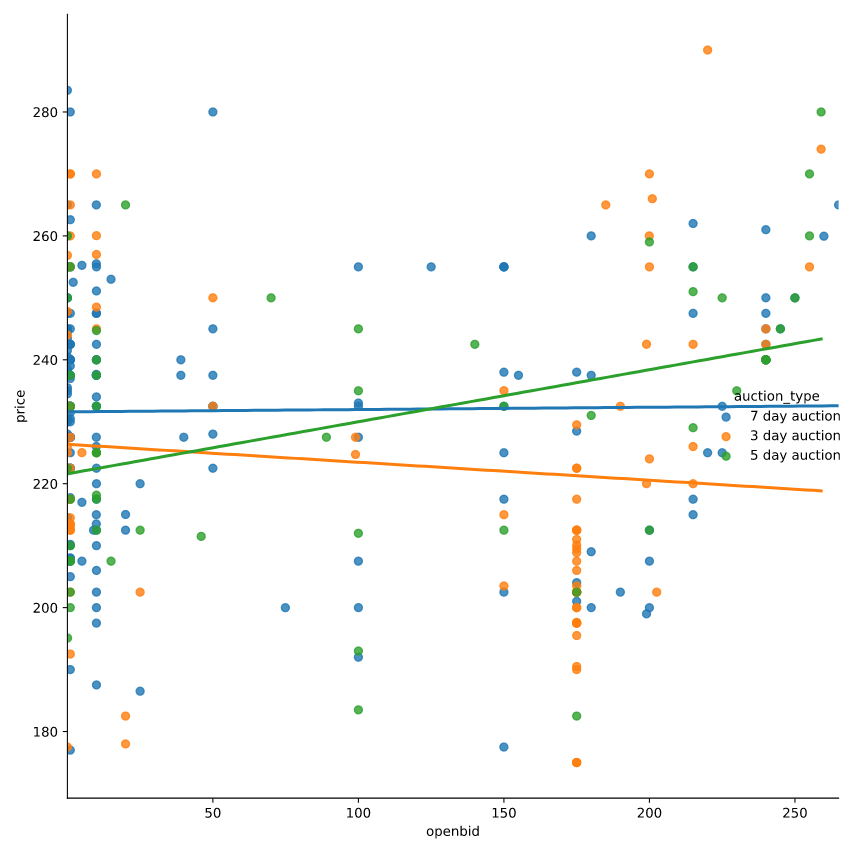

# CHAPTER 3 MULTIPLE LINEAR REGRESSION

### Two numeric explanatory variables

Three numeric variables (1 dependent and 2 independent)
- can draw a 3D scatterplot or a 2D scatterplot with color for the response variable

In [ ]:
## VISUALIZING THREE NUMERIC VARIABLES
## plot the two numeric explanatory variables on the x- and y-axis of a scatter plot
## color the points according to the response variable.
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x='n_convenience', y='sqrt_dist_to_mrt_m', data=taiwan_real_estate, hue='price_twd_msq')

# Show the plot
plt.show()

In [ ]:
## MODELING TWO NUMERIC EXPLANATORY VARIABLES
## model and predict the house prices against the number of nearby convenience stores 
## and the square-root of the distance to the nearest MRT station.

# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'sqrt_dist_to_mrt_m'])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_conv_dist.predict(explanatory_data))

# See the result  
print(prediction_data)

In [ ]:
## VISUALIZING TWO NUMERIC EXPLANATORY VARIABLES

# Create scatter plot of taiwan_real_estate
sns.scatterplot(x='n_convenience', y='sqrt_dist_to_mrt_m', data=taiwan_real_estate, hue='price_twd_msq')

# Create scatter plot of prediction_data without legend
sns.scatterplot(x='n_convenience', y='sqrt_dist_to_mrt_m', data=prediction_data, hue='price_twd_msq', marker='s', legend=False)

# Show the plot
plt.show()

In [ ]:
## INCLUDING AN INTERACTION
## almost exactly the same code as above

# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

### More than 2 Explanatory Variables

In examples above we have length plotted against height, colored by mass.
Can also facet by species
- it is possible to include as many categorical variables as needed (can also make viewing challenging)
        #col_wrap makes 2 x 2
        grid = sns.FacetGrid(data=fish, col='species', hue='mass_g', col_wrap=2,
        palette='plasma')
        
        #what visualization to plot on the grid
        grid.map(sns.scatterplot, 'length_cm', 'height_cm')
        plt.show()
    
- modeling multiple variables is easier, however there are more options regarding interaction
        # two-way interaction between pairs of variables
        mass ~ length + height + species + length:height + length:species + height: species + 0, data).fit()
        
        # three-way interaction between all three variables
        "mass ~ length + height + species + length:height + length:species + height:species + length:height:species + 0", data).fit()

short cuts, the above is the same as:
        "mass ~ length * height * species + 0"
        
        #only two-way int., not three-way int
        "mass ~ (length + height + species) ** 2 +0"

- prediction flow
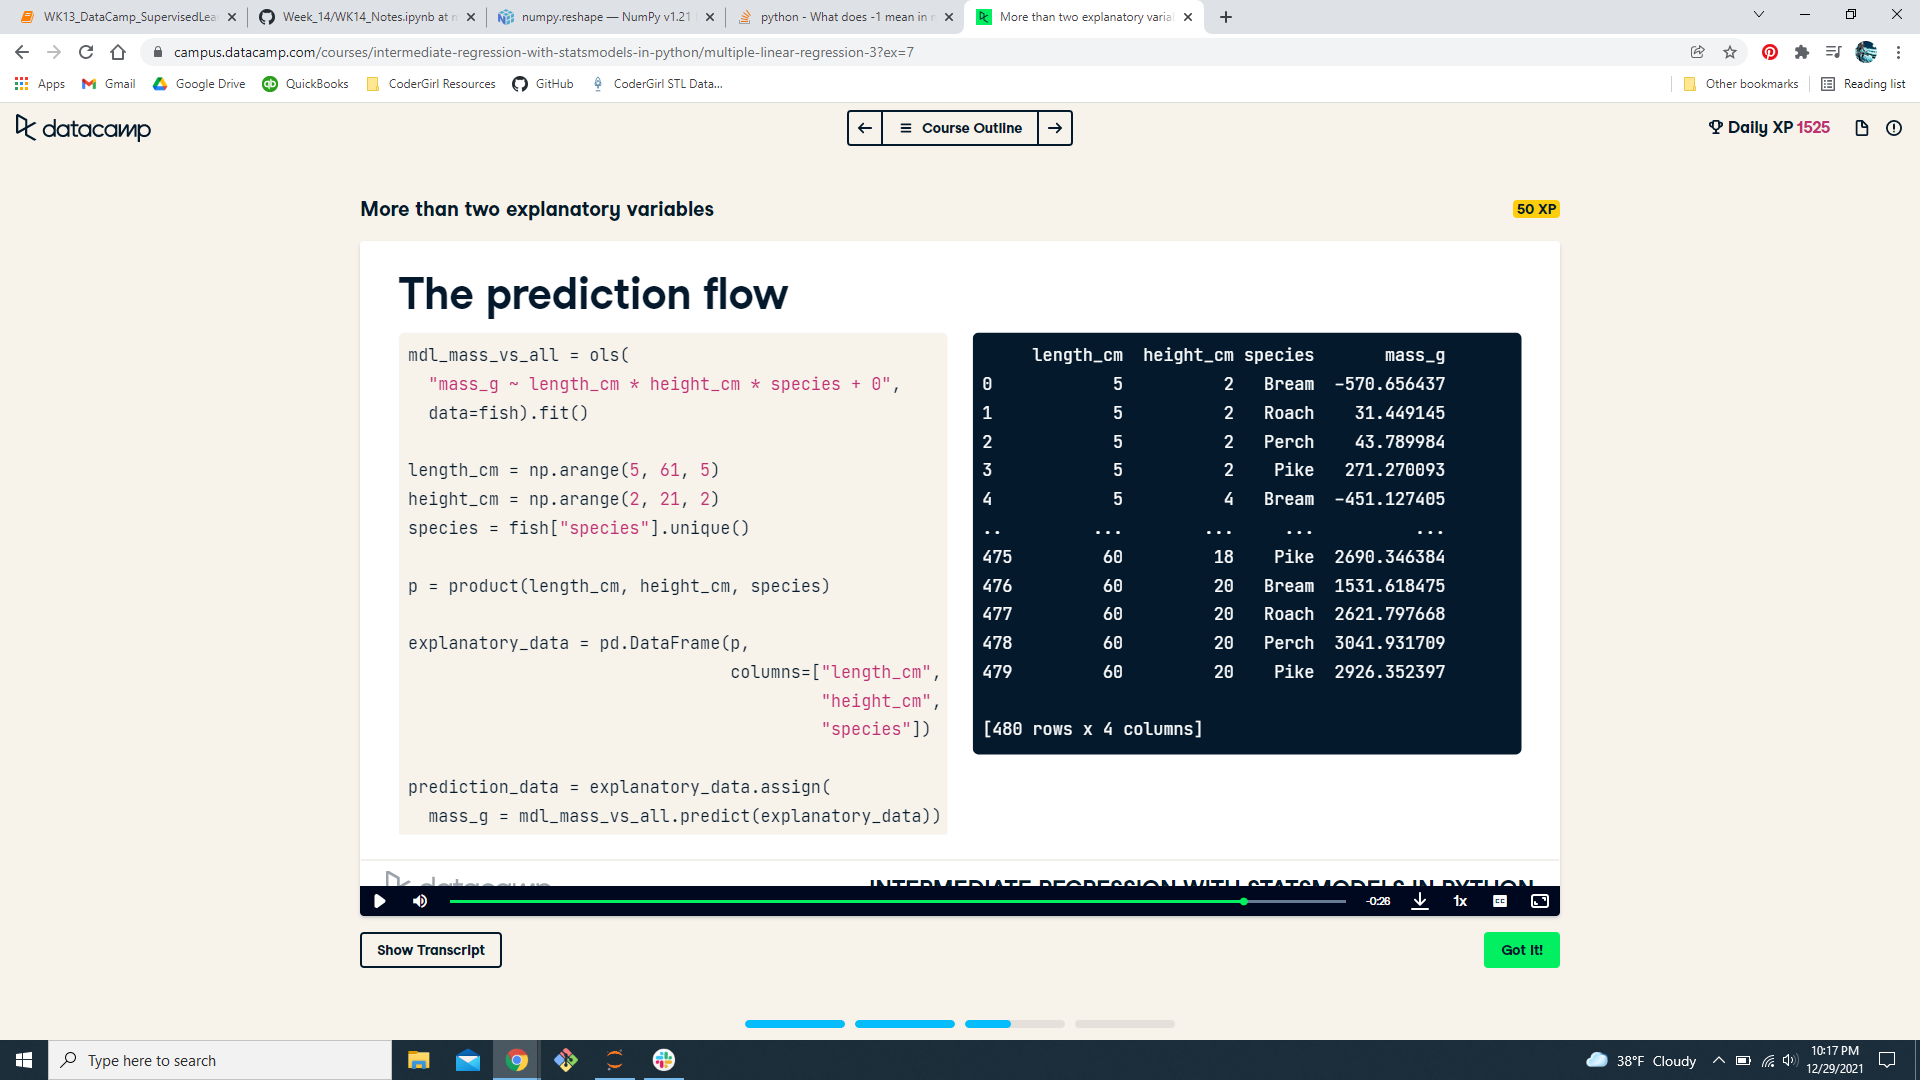

In [ ]:
## VISUALIZING MANY VARIABLES

# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col='house_age_years',
            hue='price_twd_msq',
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         'sqrt_dist_to_mrt_m',
         'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

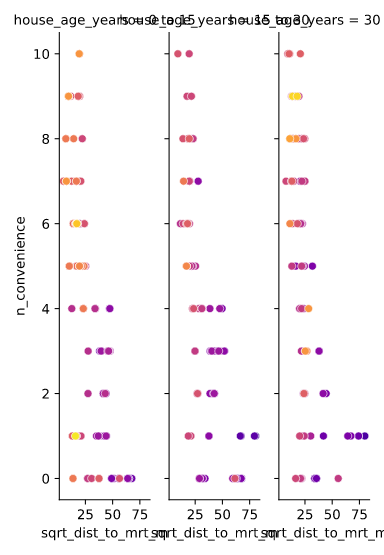

In [ ]:
## DIFFERENT LEVELS OF INTERACTION

# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols('price_twd_msq ~ n_convenience +sqrt_dist_to_mrt_m + house_age_years + 0', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + n_convenience:sqrt_dist_to_mrt_m + sqrt_dist_to_mrt_m:house_age_years + n_convenience:house_age_years + 0', data = taiwan_real_estate).fit()

In [ ]:
## PREDICTING AGAIN

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'sqrt_dist_to_mrt_m', 'house_age_years'])

# See the result
print(explanatory_data)

# Add column of predictions
# The column should be named after the response variable, 
# and contain predictions made using mdl_price_vs_all_3_way_inter 
# and explanatory_data
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)

### How Linear Regression Works
- First, write a function to calculate the sum of squares using this general syntax:
            def function_name(args):
            # some calculations with the args
            return outcome
1. Unpack coeffs to intercept and slope, respectively.
2. Calculate the predicted y-values as the intercept plus the slope times the actual x-values.
3. Calculate the differences between actual and predicted y-values.
4. Calculate the sum of squares: square the differences in y-values and take the sum.
5. Return the sum of squares.

- Second, minimize the sum of squares metric.
6. Use calc_sum_of_squares as the function to minimize.
7. Pass [0, 0] as the initial intercept and slope values for the minimize() function.
8. Compare the output with the ols() call.

In [ ]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_pred and y_actual
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff**2)
    # Return sum of squares
    return sum_sq
  
# Test the function with intercept 10 and slope 1
print(calc_sum_of_squares([10, 1]))

OUTPUT:
7667.734402786994

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0,0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

OUTPUT:
      fun: 4717.68623992569
 hess_inv: array([[ 0.00354669, -0.00057129],
       [-0.00057129,  0.00013954]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([8.22423741, 0.79807972])
Intercept        8.224237
n_convenience    0.798080
dtype: float64

## CHAPTER 4 - Multiple Logistic Regression

Using Bank churn dataset
- response variable - 'has_churned', boolean
- explanatory variables
    - 'time_since_first_purchase', float, measure of length of relationship
    - 'time_since_last_purchase', float, measure of recency of activity

- use logit() instead of ols(), same syntax
        from statsmodels.formula.api import logit
        # one exp var,
        logit('response ~ explanatory', data=dataset).fit()
        # two exp var, no interaction
        logit('response ~ explanatory1 + explanatory2', data=dataset).fit()
        # two exp var, with interaction
        logit('response ~ explanatory1 * explanatory2', data=dataset).fit()

- four outcomes of logistic regression
                        PREDICTED FALSE  -  PREDICTED TRUE  
        ACTUAL FALSE       correct            false positive
        ACTUAL TRUE        false negative     correct
        
        conf_matrix = mdl_logit.pred_table()
        print(conf_matrix)
      
- prediction flow
        from itertools import product
        exp1 = some_values
        exp2 = some_values
        p = product(exp1, exp2)
        explanatory_data = pd.DataFrame(p, columns=['exp1', 'exp2'])
        prediction_data = explanatory_data.assign(
                          response = mdl_logit.predict(explanatory_data)
- visulaization
        # create a column with most likely outcomes for visulaization
        prediction_data['most_likely'] = np.round(prediction_data['has_churned'])
        # scatterplot for actual data
        sns.scatterplot(x,y, data=churn, hue='has_churned', ...)
        # scatterplot for predictions
        sns.scatterplot(x,y,data=prediction_data, hue='most_likely',...)

In [ ]:
## LOGISTIC REGRESSION W/ 2 VAR

# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit('has_churned ~ time_since_first_purchase * time_since_last_purchase', data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

OUTPUT:
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250

In [ ]:
## LOGISTIC REGRESSION PREDICTION

# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2,4.1,0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1,6.1,0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['time_since_first_purchase', 'time_since_last_purchase'])

# Print the result
print(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# See the result
print(prediction_data)

In [ ]:
## VISUALIZING MULTIPLE EXP VAR

# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x='time_since_first_purchase', y='time_since_last_purchase', 
                data=prediction_data, hue='most_likely_outcome',
                alpha=0.2, legend=False)

# Show the plot
plt.show()

The reason why the data points lie on or to the right of the diagonal line is due to nature of the data: the time since the last purchase can't exceed the time since the first purchase. Also notice the pattern of the prediction data: longer customer relationships and shorter purchase recency predicts lower churns.
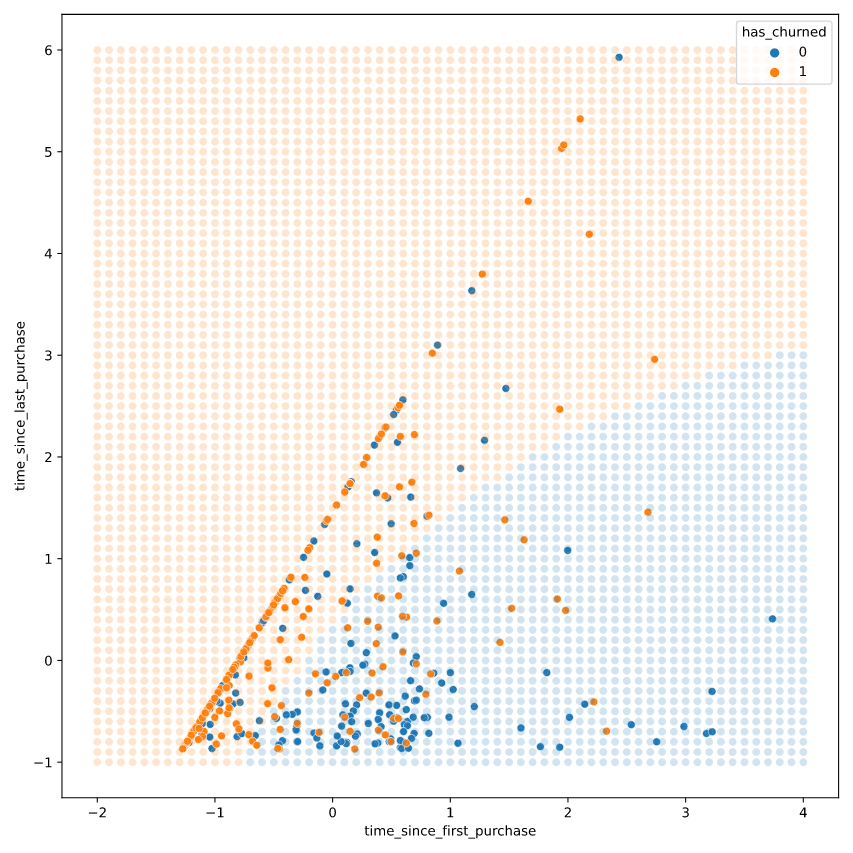

#### CONFUSION MATRIX
When the response variable has just two outcomes, like the case of churn, the measures of success for the model are "how many cases where the customer churned did the model correctly predict?" and "how many cases where the customer didn't churn did the model correctly predict?". These can be found by generating a confusion matrix and calculating summary metrics on it.

Recall the following definitions:

Accuracy is the proportion of predictions that are correct.

$\text{accuracy} = \frac{TN + TP}{TN + FN + FP + TP}$

Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.

$\text{sensitivity} = \frac{TP}{TP + FN}$

Specificity is the proportion of false observations that are correctly predicted by the model as being false.

$\text{specificity} = \frac{TN}{TN + FP}$


In [ ]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

OUTPUT:
[[102.  98.]
 [ 53. 147.]]

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN+FN+FP+TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP+FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN+FP)
print("specificity", specificity)

OUTPUT:
accuracy 0.6225
sensitivity 0.735
specificity 0.51

### The Logistic Distribution

- Gaussian probability density function (PDF) - bell curve
        from scipy.stats import norm
        x=np.arange(-4,4.05,0.05)
        gauss_dist = pd.DataFrame({'x':x, 'gauss_pdf': norm.pdf(x)})
        sns.lineplot(x='x', y='gauss_pdf', data=gauss_dist)

- Cumulative distribution function - area under bell curve
- transformation for x to probabilities
- for x=1, y=0.8 so prob of x <1 = 80%
        x=np.arange(-4,4.05,0.05)
        gauss_dist = pd.DataFrame({'x':x, 
                                   'gauss_pdf': norm.pdf(x), 
                                   'gauss_cdf': norm.cdf(x)})
        sns.lineplot(x='x', y='gauss_cdf', data=gauss_dist)
- Gaussian Inverse CDF, Pearson-Point Function (PPF) or Quantile Function (QF)
- transform from probability to x values
        p = np.arange(0.001, 1, 0.001)
        gauss_dist_inve = pd.DataFrame({'p':p, 'gauss_inv_cdf':norm.ppf(p)})
        sns.lineplot(x='p', y='gauss_inv_cdf', data=gauss_dist_inv)
  
  
- LOGISTIC distribution, looks similar to Gaussian, more feathered tails
- Logistic distribution CDF also called logistic function
        cdf(x) = 1 / (1 + e^(-x))
- Logistic distribution inverse CDF also called logit function
        inverse_cdf(p) = log(1/(1-p))

In [ ]:
## CUMULATIVE DIST FUNCTION

# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1/(1+np.e**(-x))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf_man"], logistic_dist["log_cdf_man"]))

OUTPUT:
True

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x='x', y='log_cdf', data=logistic_dist)

# Show the plot
plt.show()

#sigmoid shape curve

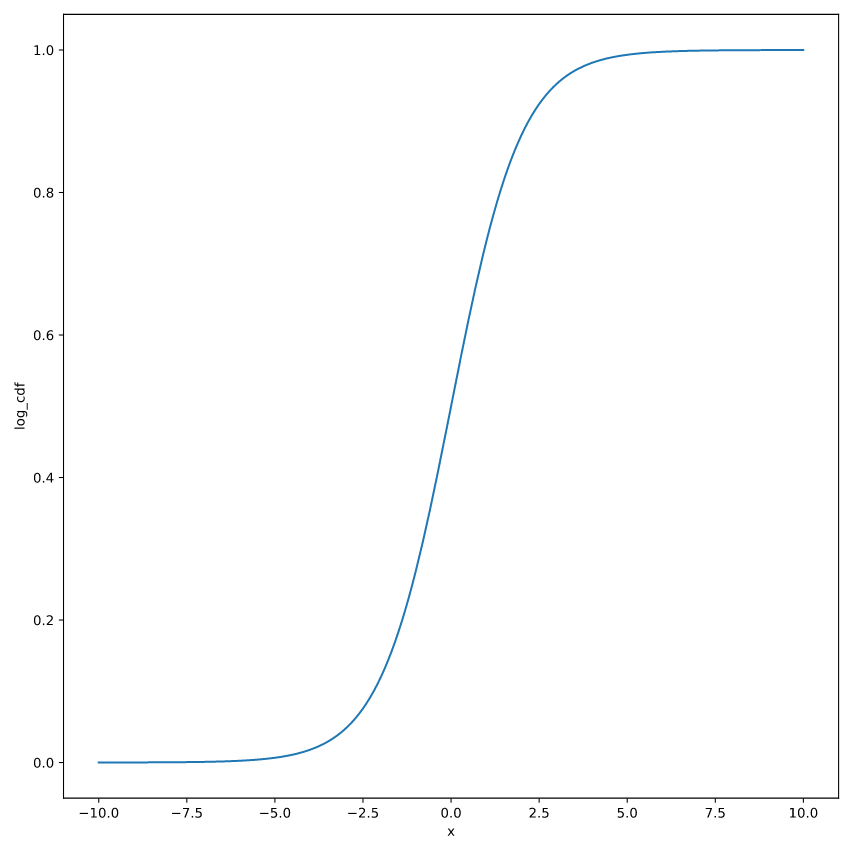

In [ ]:
## INVERSE CUMULATIVE DISTRIBUTION FUNCTION

# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x='p', y='logit', data=logistic_dist_inv)

# Show the plot
plt.show()

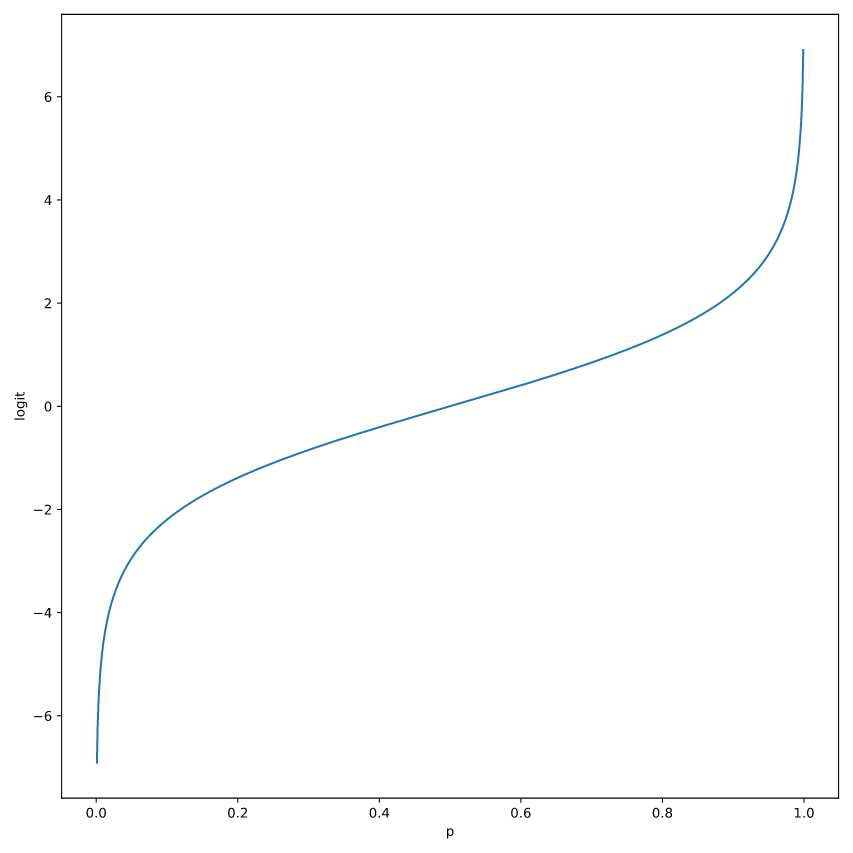

### How Logistic Regressino Works
 
- In Linear Regression - optimize sum of squares
- In Logistic Regression - response is between 0 and 1 so um of squares doesnt work
- Use Liklihood - find maximum value
        np.sum(y_pred * y_actual + (1 - y_pred) * (1 - y_actual))
- Log Liklihood - both give same answer, more computationally stable
        log_liklihoods = np.log(y_pred) * y_actual + np.log(1-y_pred) * (1-y_actual)
    
- Maximizing log-liklihood is the same as minimizing negative log-liklihoods
- since we want to maximize log-likelihood, but minimize() defaults to finding minimum values, it is easier to calculate the negative log-likelihood
        # calculate negative sum of log-likelihood contributions
        -np.sum(log_liklihoods)
        
- Logistic regression algorithm
        def calc_neg_log_liklihood(coeffs):
        intercept, slop = coeffs
        # more calculations
        from scipy.optimize import minimize
        minimize(fun=calc_neg_log_liklihood, x0=[0,0])

In [ ]:
## LOGISTIC REGRESSION ALGORITHM

# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

OUTPUT:
1997.9624945172732

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0,0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

OUTPUT:
Intercept                  -0.035019
time_since_last_purchase    0.269215